#Lista 1
-------------


**Objetivo**: Treinar modelos de classificação utilizando Regressão Logística e Árvore de Decisão.


**Banco de Dados**: Detecção de Doenças no Fígado


[Link para o banco](https://drive.google.com/file/d/1jnLwuv4e_ZeCqluMXs3Mar2TGetumtVv/view?usp=drive_link) 


Descrição do banco:
> Este banco de dados contém registros de 416 pacientes diagnosticados com doença no fígado e 167 pacientes sem a doença. Esta informação está na coluna `Selector`.
>
> O banco de dados possui 10 variáveis:
>
> * `age`: idade
> * `Gender`: gênero do paciente
> * `TB`: Bilirrubina total
> * `DB`: Bilirrubina direta
> * `Alkphos`: fosfatase alcalina.
> * `Sgpt`: transaminase glutâmico-pirúvica sérica (TGP)
> * `Sgot`: transaminase glutâmico-oxalacética sérica (TGO)
> * `TP`: Proteína total
> * `ALB`: Albumina
> * `A/G Ratio`: Relação Albumina:Globulina


Exercício:


1. Carregue o banco de dados e analise suas features (calcule as descritivas).  
* Transforme a feature sexo em uma variavel dummy.
2. Separe o banco dados:
* Utilize 80% dos dados para treino e 20% para teste.
3. Treine um modelo de Regressão Logística.
* Interprete dois coeficientes.
4. Treine um modelo de árvore de decisão. 
* Utilize max_depth de 4.
* Identifique as duas features mais importantes.
5. Construa um relatório comparativo dos dois modelos:
* Utilizando a **precisão da classe de pacientes doentes**, qual modelo tem melhor desempenho na detecção de doença no fígado?
* Utilizando o **f1-score da classe de pacientes doentes**, qual modelo tem melhor desempenho na detecção de doença no fígado?


Obs.: Utilize o **mesmo** conjunto de treino e teste para construir e avaliar ambos os modelos.

## 1. Carga do banco
--------------------

In [1]:
# Load necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('./dataset/Indian Liver Patient Dataset (ILPD).csv')

### 1.2. Limpeza dos Dados
--------------------

In [2]:
# Rename columns, remove white spaces and special caracters override by underscore and turn to lower case
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/', '_').str.replace('-', '_')

In [10]:
if (df.isnull().values.any()):
    # Foreach columns with null values and fill with mean
    
    
    

SyntaxError: incomplete input (2411703711.py, line 3)

### 1.3. Informações e Estatisticas Básicas do Dataset
--------------------

In [3]:
# Descrbie main statistics
df.describe()

,age,tb,db,alkphos,sgpt,sgot,tp,alb,a_g_ratio,selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
df['a_g_ratio'].fillna(df['a_g_ratio'].mean(), inplace=True)

/var/folders/bw/1sh_h7vd347d33_w29khkbbm0000gn/T/ipykernel_67637/3685742803.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['a_g_ratio'].fillna(df['a_g_ratio'].mean(), inplace=True)


In [4]:
# Transform gender column into dummy variables
df = pd.get_dummies(df, columns=['gender'])

In [ ]:
df.kurtosis(skipna=True)

# Interpretação
    # Kurtose > 3: A distribuição é leptocúrtica, as caudas são mais pesadas que as da distribuição normal e há muitos outliers.
    # Kurtose < 3: A distribuição é platicúrtica, as caudas são mais finas que as da distribuição normal e há menos outliers.
    # Kurtose = 3: A distribuição é mesocúrtica, com caudas semelhantes às da distribuição normal.

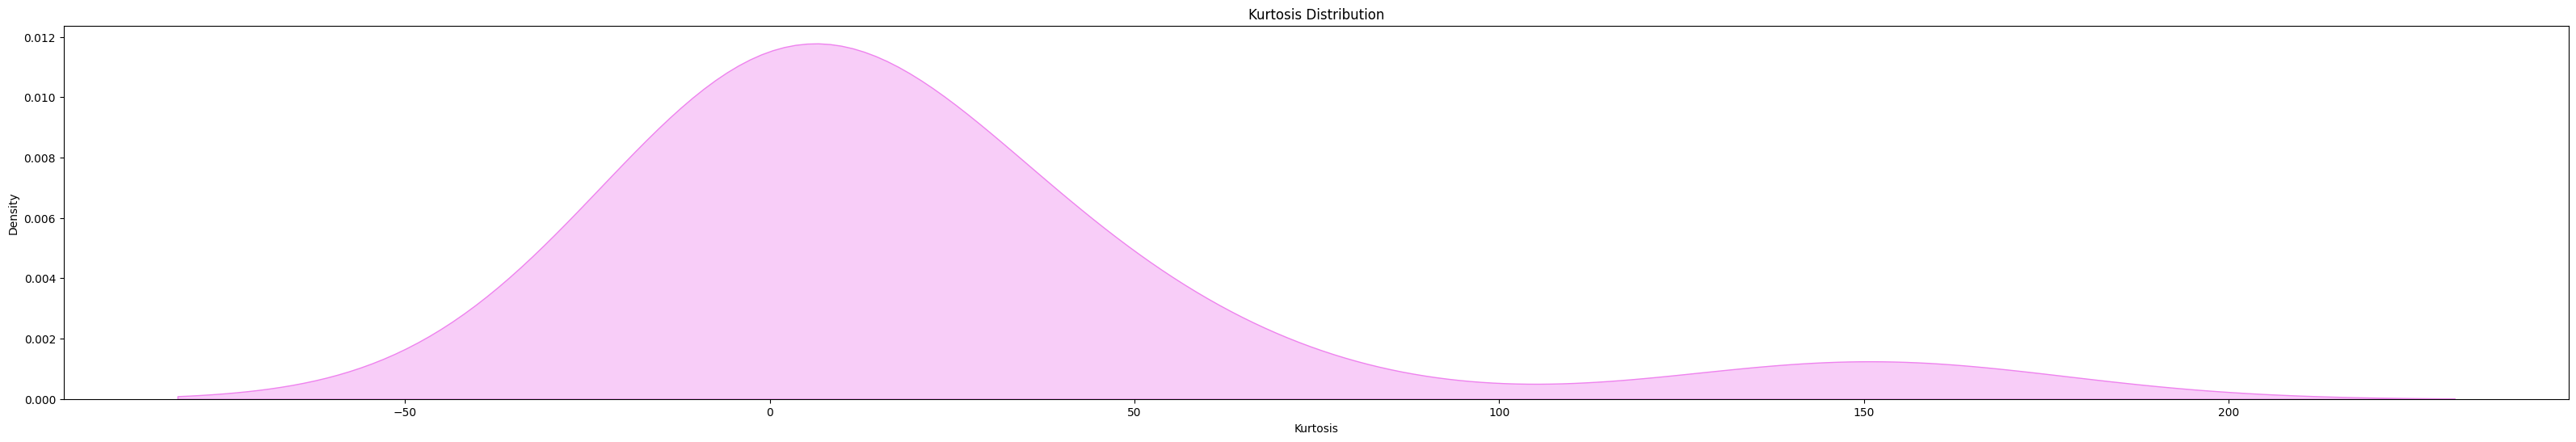

In [6]:
plt.figure(figsize=(40, 6))
plt.title('Kurtosis Distribution')
plt.xlabel('Kurtosis')
plt.ylabel('Density')

sns.kdeplot(df.kurtosis(), color='violet', fill=True, legend=True, alpha=0.4)

plt.show();

Kurtose Alta:
Os valores de kurtose mais elevados, que se estendem para mais de 100, indicam que a distribuição possui caudas mais grossas do que o normal, características de uma distribuição leptocúrtica. Isso significa que essa distribuição tem muitos valores extremos, ou outliers.


Implicações:
Distribuições com kurtose alta são mais propensas a ter eventos extremos (outliers) do que distribuições normais (mesocúrticas), o que pode impactar análises estatísticas, tornando-as mais sensíveis a essas observações extremas.

## 2. Quebra do banco
--------------------

In [7]:
# import scikit-learn libraries
from sklearn.model_selection import train_test_split

# Split the dataset into training and test set
X = df.drop('selector', axis=1)
y = df['selector']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3. Primeiro modelo
--------------------

In [8]:
# Import Logistic Regression from scikit-learn
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## 3.1 Interpretação de dois coeficientes
--------------------

In [15]:
# Import confusion_matrix from scikit-learn
from sklearn.metrics import confusion_matrix

# Metrics to evaluate the model
confusion_matrix(y_test, y_pred)


array([[80,  7],
       [22,  8]])

In [16]:
# Import classification_report from scikit-learn
from sklearn.metrics import classification_report

# Metrics to evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.92      0.85        87
           2       0.53      0.27      0.36        30

    accuracy                           0.75       117
   macro avg       0.66      0.59      0.60       117
weighted avg       0.72      0.75      0.72       117



## 1. Métricas Explicadas:

### Precision (Precisão):
A **precision** mede a proporção de exemplos **verdadeiros positivos** entre todos os exemplos classificados como positivos.

### Recall (Revocação ou Sensibilidade):
O **recall** mede a proporção de exemplos verdadeiros positivos capturados entre todos os exemplos que realmente pertencem à classe.

### F1-Score:
O **F1-score** é a média harmônica entre precision e recall, sendo uma métrica que equilibra ambas. Um F1-score alto indica que o modelo tem um bom equilíbrio entre precisão e revocação.

### Support:
O **support** representa o número de ocorrências reais de cada classe no dataset de teste.

---

## 2. Interpretação dos Resultados:

### Classe 1:
- **Precision**: 0.78
  - De todas as instâncias que o modelo previu como "Classe 1", 78% estavam corretas.
- **Recall**: 0.92
  - De todas as instâncias que realmente pertencem à Classe 1, o modelo conseguiu identificar corretamente 92%.
- **F1-Score**: 0.85
  - O modelo tem um bom equilíbrio entre precisão e recall para a Classe 1, o que resulta em um bom F1-score.
- **Support**: 87
  - Havia 87 exemplos no conjunto de dados que pertenciam à Classe 1.

### Classe 2:
- **Precision**: 0.53
  - De todas as instâncias que o modelo previu como "Classe 2", 53% estavam corretas.
- **Recall**: 0.27
  - De todas as instâncias que realmente pertenciam à Classe 2, o modelo conseguiu identificar corretamente apenas 27%.
- **F1-Score**: 0.36
  - O modelo tem um desempenho significativamente pior na Classe 2, resultando em um F1-score baixo.
- **Support**: 30
  - Havia apenas 30 exemplos pertencentes à Classe 2 no conjunto de dados.

---

## 3. Métricas Globais:

### Accuracy:
- **Accuracy**: 0.75
  - O modelo acertou 75% das previsões no conjunto de teste, ou seja, de todas as instâncias, 75% foram corretamente classificadas.

### Macro Average:
- A **macro average** calcula a média das métricas (precision, recall, F1-score) de cada classe **sem considerar o número de exemplos** em cada classe.
- Aqui, a precision média é 0.66, recall é 0.59 e F1-score é 0.60. Isso reflete um desempenho geral mediano, influenciado pela má performance na Classe 2.

### Weighted Average:
- A **média ponderada** considera a proporção de exemplos em cada classe ao calcular a média. Isso significa que a performance na Classe 1 (que tem mais exemplos) tem maior peso.
- A média ponderada para precision é 0.72, recall é 0.75 e F1-score é 0.72. Esses valores são mais altos porque o modelo teve um desempenho melhor na Classe 1, que tem mais exemplos.

---

## 4. Conclusão:
- O modelo tem um desempenho bom para a **Classe 1**, com altos valores de precision, recall e F1-score.
- Para a **Classe 2**, o modelo apresenta dificuldades, especialmente no recall (só identifica 27% dos exemplos da Classe 2 corretamente).
- O valor de **accuracy** geral é 0.75, mas esse número é influenciado pelo maior número de exemplos na Classe 1. O desempenho na Classe 2 é claramente inferior, o que reduz a macro average e deve ser uma área de foco para melhorar o modelo.


## 4. Segundo modelo
--------------------

In [43]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict the test set
y_pred = dt_model.predict(X_test)

# Metrics to evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.84      0.76      0.80        87
           2       0.45      0.57      0.50        30

    accuracy                           0.71       117
   macro avg       0.64      0.66      0.65       117
weighted avg       0.74      0.71      0.72       117



## 4.1 Duas features mais importantes
--------------------

age: 0.12872685283756152
tb: 0.03014850840949856
db: 0.13236448236643789
alkphos: 0.24247658054659538
sgpt: 0.15728105260702255
sgot: 0.09948865353023927
tp: 0.09522992557091985
alb: 0.04304286248502107
a_g_ratio: 0.06379469573094604
gender_Female: 0.0
gender_Male: 0.007446385915757818


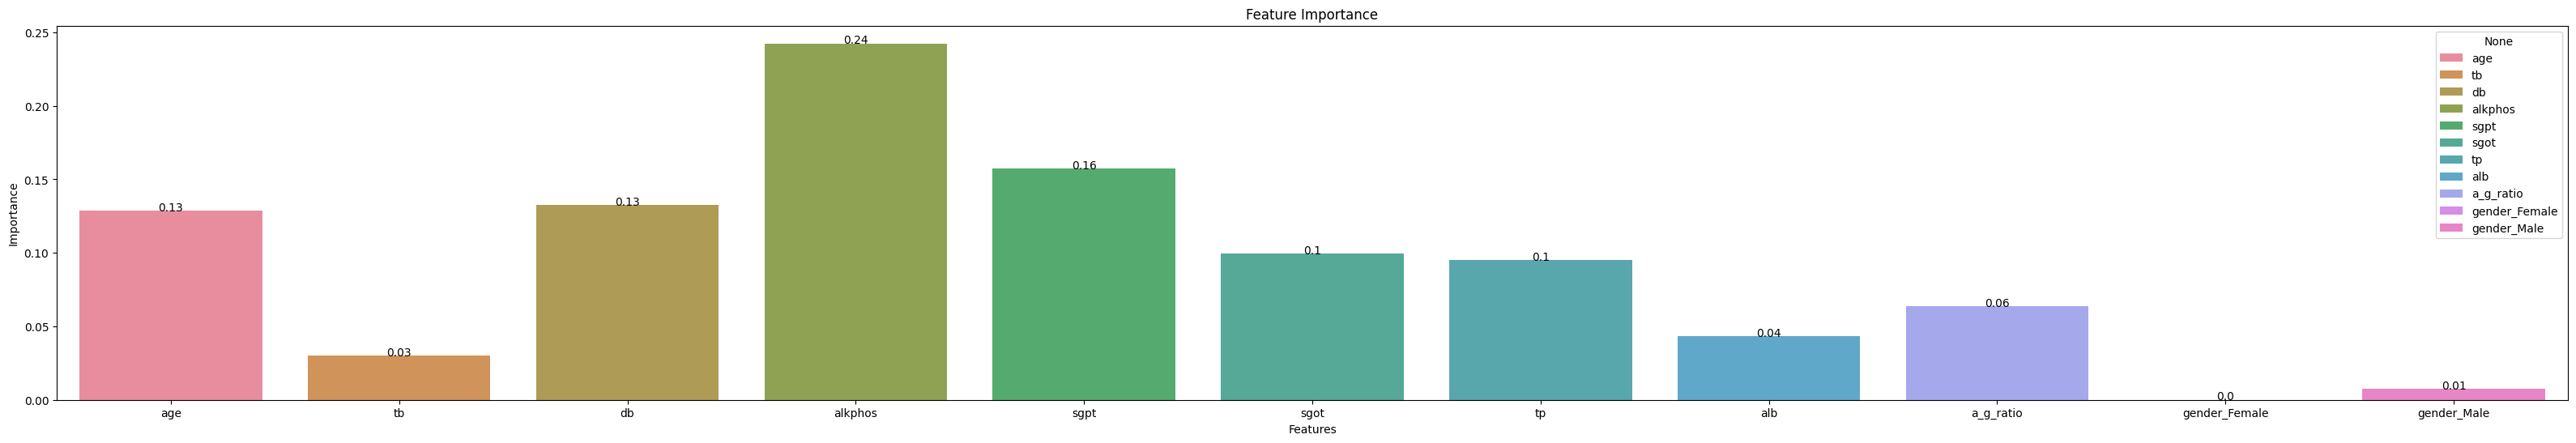

In [51]:
# What is the most important features?
importances = dt_model.feature_importances_

# Print importances values for each feature 
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')
    
# Plot a chart with the most important features
plt.figure(figsize=(40, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')

sns.barplot(x=X.columns, y=importances, alpha=0.9, legend=True, hue=X.columns, dodge=False);

# Add column values to the chart
for i in range(len(X.columns)):
    plt.text(i, importances[i], round(importances[i], 2), ha = 'center')

plt.show();

In [52]:
print('The most important feature is: ', X.columns[importances.argmax()])
print('The second most important feature is: ', X.columns[importances.argsort()[-2]])

The most important feature is:  alkphos
The second most important feature is:  sgpt


## 5. Avaliação do modelo
--------------------

# Avaliação de Resultados do Modelo

## 1. Métricas por Classe

### Classe 1
- **Precision**: 0.84  
  Isso indica que, entre as previsões positivas para a classe 1, 84% estavam corretas.
  
- **Recall**: 0.76  
  Isso significa que, de todos os verdadeiros exemplos da classe 1, 76% foram corretamente identificados.
  
- **F1-Score**: 0.80  
  Uma média harmônica entre precision e recall, mostrando um bom equilíbrio para a classe 1.
  
- **Support**: 87  
  O número de amostras da classe 1.

### Classe 2
- **Precision**: 0.45  
  Apenas 45% das previsões positivas para a classe 2 estavam corretas, sugerindo um problema na precisão.
  
- **Recall**: 0.57  
  Dos exemplos verdadeiros da classe 2, 57% foram corretamente identificados.
  
- **F1-Score**: 0.50  
  A combinação de precision e recall, relativamente baixa para a classe 2.
  
- **Support**: 30  
  O número de amostras da classe 2.

## 2. Métricas Globais
- **Accuracy**: 0.71  
  O modelo classificou corretamente 71% de todas as amostras. Essa métrica pode não refletir totalmente o desempenho em cada classe, especialmente com o desequilíbrio entre elas.

### Macro Average (Média Macro)
- **Precision**: 0.64  
- **Recall**: 0.66  
- **F1-Score**: 0.65  
  Essas métricas são uma média simples entre as classes, sem considerar o desequilíbrio no número de exemplos.

### Weighted Average (Média Ponderada)
- **Precision**: 0.74  
- **Recall**: 0.71  
- **F1-Score**: 0.72  
  Essas métricas consideram o suporte de cada classe, refletindo mais o desempenho da classe 1.

## Conclusão
O modelo apresenta desempenho significativamente melhor na classe 1, mas enfrenta dificuldades na previsão correta da classe 2. A baixa precisão para a classe 2 (0.45) indica muitas previsões incorretas. Isso pode ser atribuído a um desequilíbrio entre as classes, sugerindo a necessidade de técnicas para lidar com esse problema, como balanceamento de dados ou ajuste do threshold de decisão. No geral, o modelo tem uma precisão razoável (0.71), mas o desempenho da classe minoritária requer melhorias.


## 5.1 Qual modelo escolhido olhando para a precisão de detecção de doença no fígado?
--------------------

Para precisão de detcção, olhando o Recall (responsável pela identificação de respostas positivas), a opção seria o Modelo 1 - qque gerou os seguintes resultados:
           
           precision    recall  f1-score   support
           1       0.84      0.76      0.80        87
           2       0.45      0.57      0.50        30

Enquanto que o modelo 2 gerou os seguintes resultados:

           precision    recall  f1-score   support
           1       0.78      0.92      0.85        87
           2       0.53      0.27      0.36        30


Desta forma podemos concluir que:


- **Recall**: O Modelo 1 é superior em termos de recall (0.57) para a classe de doenças, o que significa que ele é mais eficaz em detectar casos de doenças em comparação com o Modelo 2 (recall de 0.27).
- **Precision**: O Modelo 2 tem uma precisão melhor (0.53) na identificação de casos doentes, mas isso é menos relevante se o modelo não consegue detectar muitos dos casos positivos (baixa sensibilidade).



## 5.2 Qual modelo escolhido olhando para o f1-score do rótulo de doença do fígado?
--------------------

Melhor Opção 

Considerando o F1-score, o Modelo 1 é a melhor opção. Embora o Modelo 2 tenha um F1-score mais alto para a Classe 1, o desempenho do Modelo 1 na Classe 2 é mais crítico para aplicações de saúde. O Modelo 1 apresenta uma média ponderada igual ao Modelo 2, mas com um desempenho melhor na detecção de doenças, o que é fundamental em cenários clínicos.